In [23]:
# 数据内容
# user_id order_date order_num order_account

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']

In [25]:
# 导入数据
columns = ['user_id', 'order_dt', 'order_num', 'order_account']
df = pd.read_table('CDNOW_master.txt', names=columns,sep='\s+')  # sep:'\s+'：匹配任意个空格
df.head()
# 1.日期格式转换； 2.存在同一用户一天多次购买

,user_id,order_dt,order_num,order_account
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [26]:
df.describe()

,user_id,order_dt,order_num,order_account
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_num      69659 non-null  int64  
 3   order_account  69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


#### 数据预处理 ####

In [28]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
# 转换为按月精度的时间戳
df['month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()  # 精度转化为月
df.head()

,user_id,order_dt,order_num,order_account,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [29]:
df.dtypes

user_id                   int64
order_dt                  int64
order_num                 int64
order_account           float64
order_date       datetime64[ns]
month            datetime64[ns]
dtype: object

Text(0.5, 1.0, '每月的消费人数')

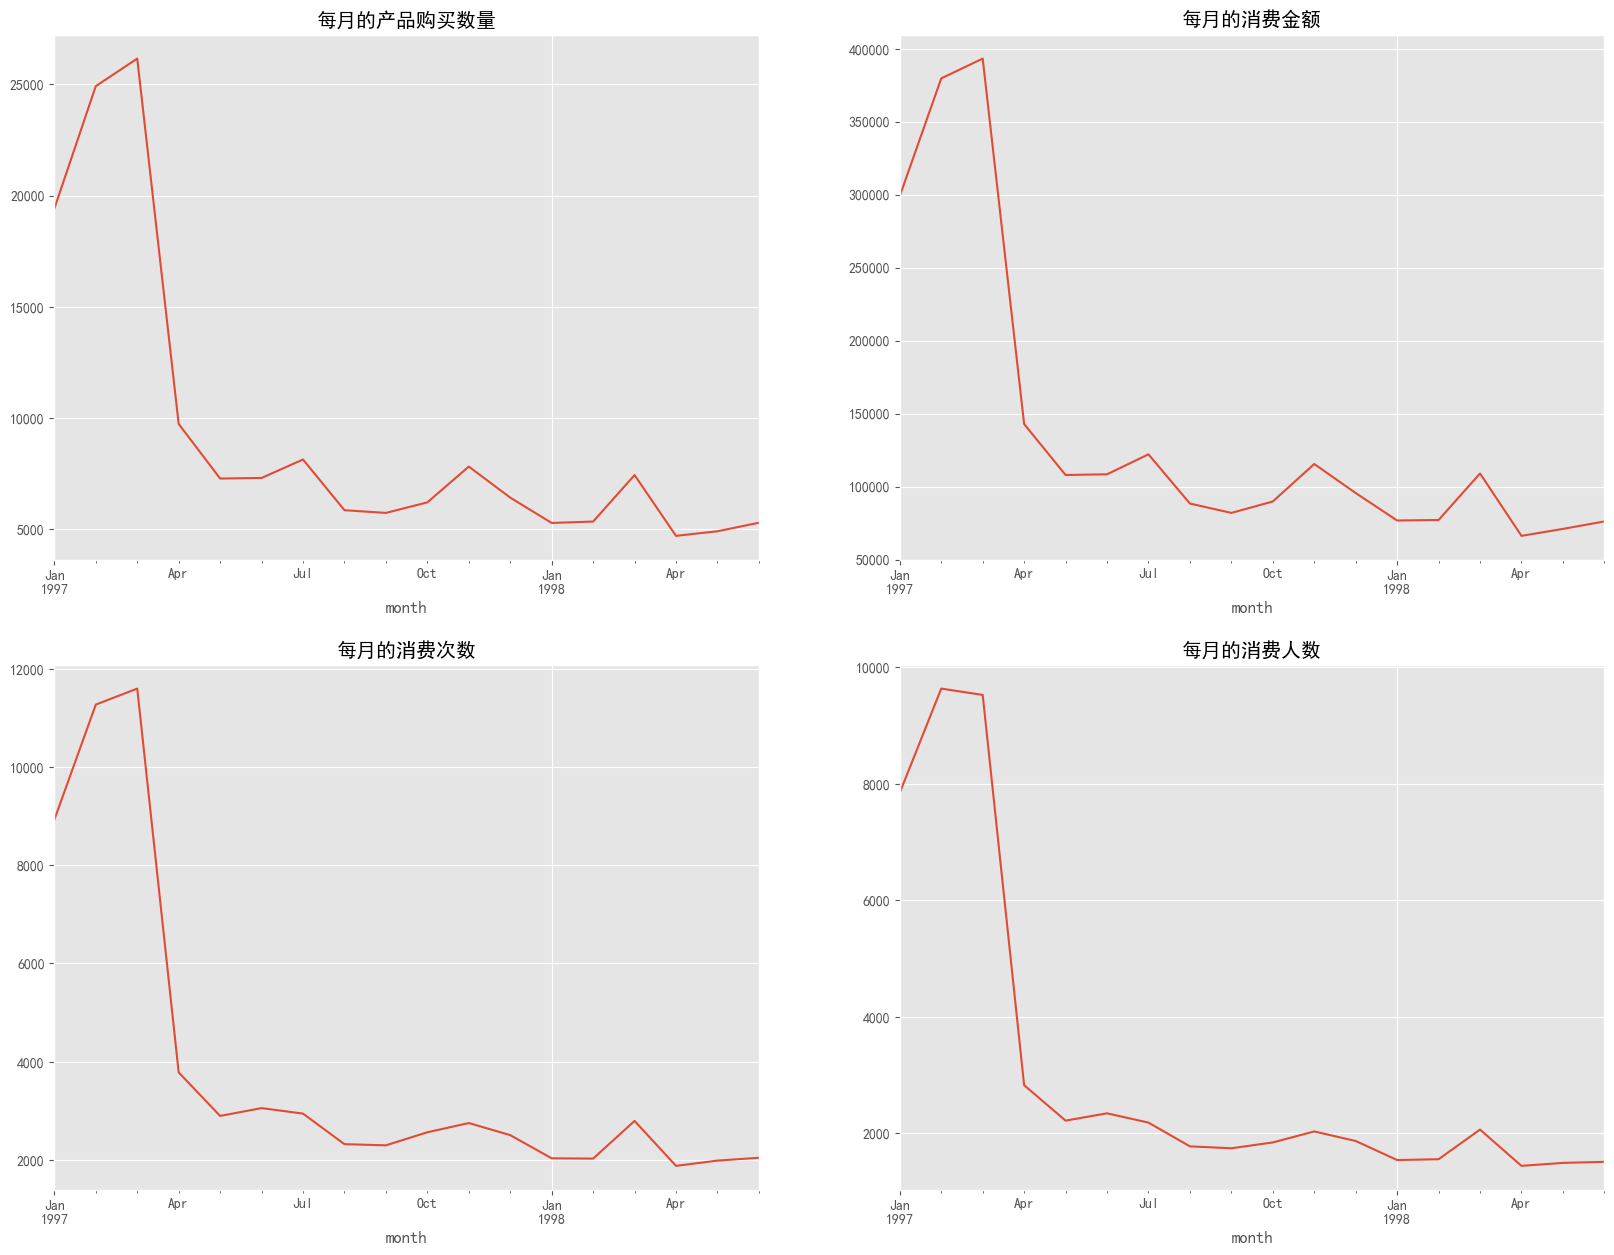

In [30]:
# 按月份统计
plt.figure(figsize=(20, 15))
#每月产品购买数量
plt.subplot(221)  # 两行两列，占据第一个位置
df.groupby(by='month')['order_num'].sum().plot()
plt.title('每月的产品购买数量')

#每月消费金额
plt.subplot(222)
df.groupby(by='month')['order_account'].sum().plot()
plt.title('每月的消费金额')
#  每月消费次数
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费次数')
#  每月消费人数
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('每月的消费人数')

In [33]:
# 用户个体维度
print(df.dtypes)
df_numeric = df.drop(columns=['order_date', 'month'])
user_grouped = df_numeric.groupby(by='user_id').sum()
print(user_grouped.describe())
print('用户数量：',len(user_grouped))

user_id                   int64
order_dt                  int64
order_num                 int64
order_account           float64
order_date       datetime64[ns]
month            datetime64[ns]
dtype: object
           order_dt     order_num  order_account
count  2.357000e+04  23570.000000   23570.000000
mean   5.902627e+07      7.122656     106.080426
std    9.460684e+07     16.983531     240.925195
min    1.997010e+07      1.000000       0.000000
25%    1.997021e+07      1.000000      19.970000
50%    1.997032e+07      3.000000      43.395000
75%    5.992125e+07      7.000000     106.475000
max    4.334408e+09   1033.000000   13990.930000
用户数量： 23570


<Axes: xlabel='order_num', ylabel='order_account'>

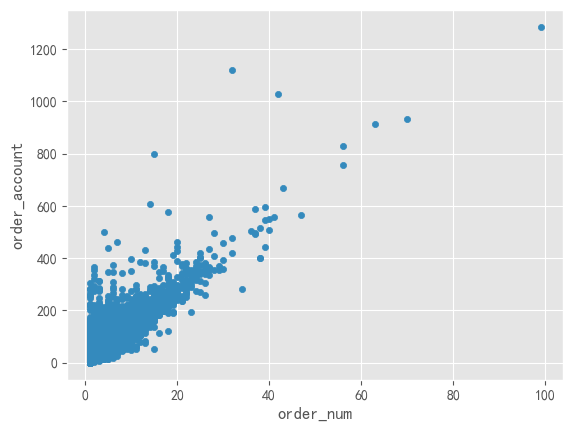

In [35]:
df.plot(kind='scatter', x='order_num', y='order_account')

<Axes: ylabel='Frequency'>

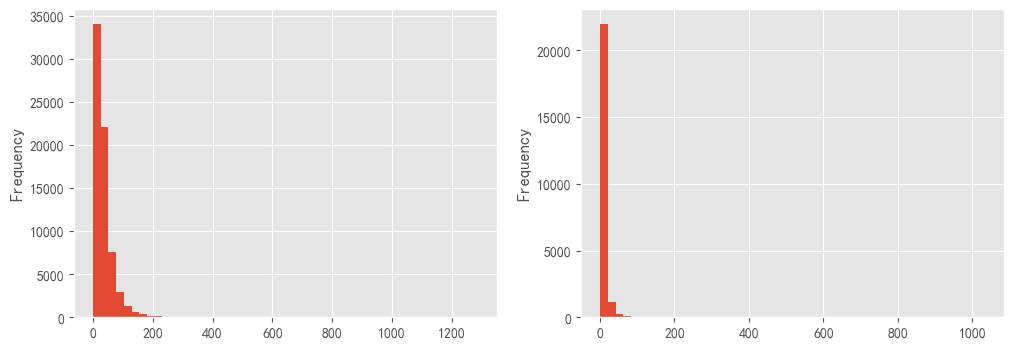

In [42]:
# 用户消费分布图
plt.figure(figsize=(12,4))
plt.subplot(121) 
plt.xlabel('每个订单消费金额')
df['order_account'].plot(kind='hist',bins=50)  # bins:区间分数，影响柱子宽度，宽度 = (列最大值 - 最小值) / bins

plt.subplot(122)
plt.xlabel('每个uid购买数量') 
df.groupby(by='user_id')['order_num'].sum().plot(kind='hist',bins=50)

In [48]:
# 用户累计消费金额占比分析
user_cumsum = df.groupby(by='user_id')['order_account'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_account
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [51]:
# 每个用户消费金额累加
user_cumsum['num_cumsum'] = user_cumsum['order_account'].cumsum()
user_cumsum.tail()

,user_id,order_account,num_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [53]:
num_total = user_cumsum['num_cumsum'].max()  # 消费金额总值
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['num_cumsum'] / num_total,axis=1)  # 前x名用户的总贡献率
user_cumsum.tail()

,user_id,order_account,num_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


<Axes: >

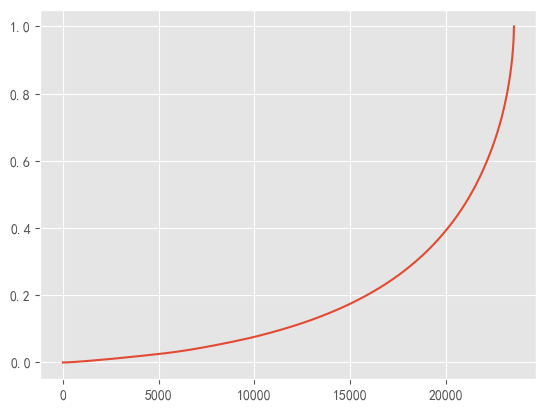

In [54]:
user_cumsum['prop'].plot()